%matplotlib inline
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# 媒体行业技能互补性>0.6

In [9]:
df_s= pd.read_excel(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17\媒体行业技能互补性大于0.6.xlsx')
m=list(zip(df_s.skill1,df_s.skill2,df_s.media_theta))
n=list(zip(df_s.skill1,df_s.skill2))

In [10]:
df_s.head()

,skill1,skill2,media_theta
0,0,6,0.615385
1,0,7,0.615385
2,0,60,0.615385
3,0,61,0.615385
4,0,69,0.615385


In [12]:
df_t= pd.read_excel(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17\媒体行业技能互补性大于0.6 - 重复.xlsx')

In [13]:
theta=df_t.groupby('skill1').mean()
theta1=theta.reset_index()

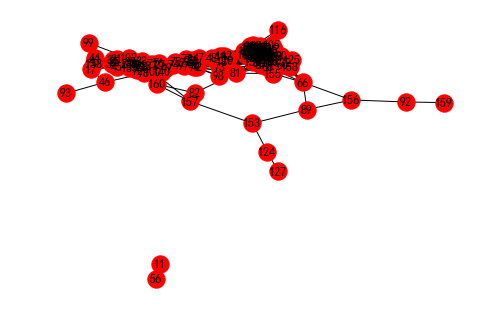

In [14]:
G = nx.Graph()
G.add_edges_from(n)
# b = nx.betweenness_centrality(G)
nx.draw(G, with_labels=True)
plt.show()
# for v in G.nodes():
#     print("%0.2d %5.3f" % (v, b[v]))

In [15]:
dc = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness= nx.betweenness_centrality(G)

In [16]:
import pandas as pd
dc_1=pd.Series(dc)
closeness_1=pd.Series(closeness)
betweenness_1=pd.Series(betweenness)

In [17]:
centre=pd.DataFrame([dc_1,closeness_1,betweenness_1])

In [18]:
centre1=centre.T
centre1=centre1.rename(columns={0:'度中心性',1:'中介中心性',2:'接近中心性'})
# centre1.head()

,0,1,2
0,0.500000,0.438185,0.004714
1,0.436620,0.414499,0.001182
2,0.500000,0.438185,0.004714
3,0.450704,0.427332,0.001656
4,0.436620,0.466311,0.007703


In [19]:
# centre1=centre1.rename(columns={0:'度中心性',1:'中介中心性',2:'接近中心性'})
# centre1.head()

,度中心性,中介中心性,接近中心性
0,0.500000,0.438185,0.004714
1,0.436620,0.414499,0.001182
2,0.500000,0.438185,0.004714
3,0.450704,0.427332,0.001656
4,0.436620,0.466311,0.007703


In [21]:
theta2=theta1.merge(centre1,how='left',left_on='skill1',right_index=True)
# theta2

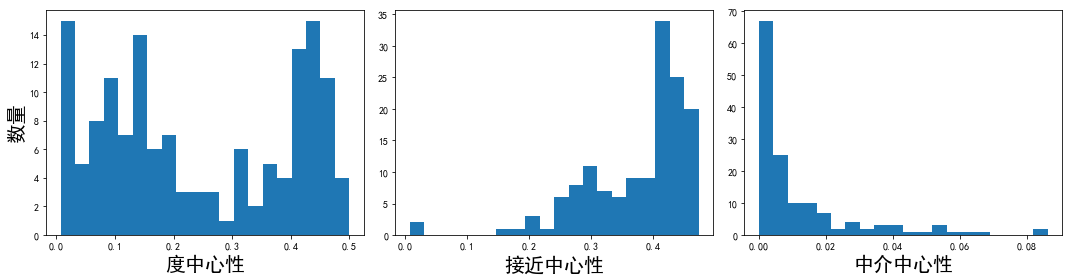

In [22]:
fig = plt.figure(figsize=(15, 4),facecolor='white')
ax = plt.subplot(1, 3, 1)
plt.hist(dc.values(), bins = 20)
plt.xlabel('度中心性', fontsize = 20)
plt.ylabel('数量', fontsize = 20)

ax = plt.subplot(1, 3, 2)
plt.hist(closeness.values(), bins = 20)
plt.xlabel('接近中心性', fontsize = 20)

ax = plt.subplot(1, 3, 3)
plt.hist(betweenness.values(), bins = 20)
plt.xlabel('中介中心性', fontsize = 20)
plt.tight_layout()
plt.show()

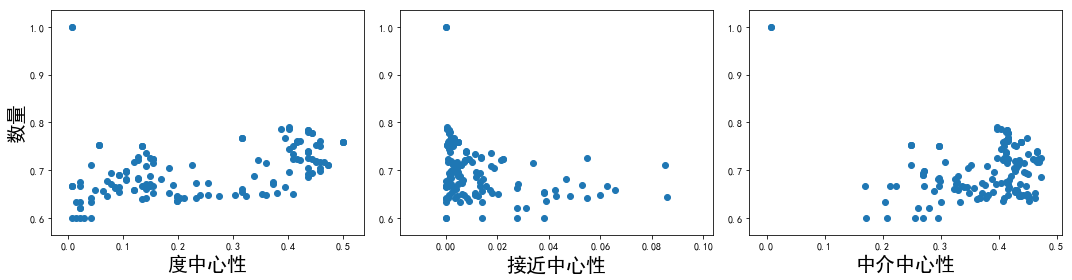

In [24]:
plt.rcParams['font.sans-serif']=['SimHei']#用来显示正常的中文标签
plt.rcParams['axes.unicode_minus']=False#用以正常显示符号
fig = plt.figure(figsize=(15, 4),facecolor='white')
ax = plt.subplot(1, 3, 1)
plt.scatter(theta2['度中心性'],theta2['media_theta'])
plt.xlabel('度中心性', fontsize = 20)
plt.ylabel('数量', fontsize = 20)

ax = plt.subplot(1, 3, 2)
plt.scatter(theta2['接近中心性'],theta2['media_theta'])
plt.xlabel('接近中心性', fontsize = 20)

ax = plt.subplot(1, 3, 3)
plt.scatter(theta2['中介中心性'],theta2['media_theta'])
plt.xlabel('中介中心性', fontsize = 20)
plt.tight_layout()
plt.show()

Text(0,0.5,'互补性水平')

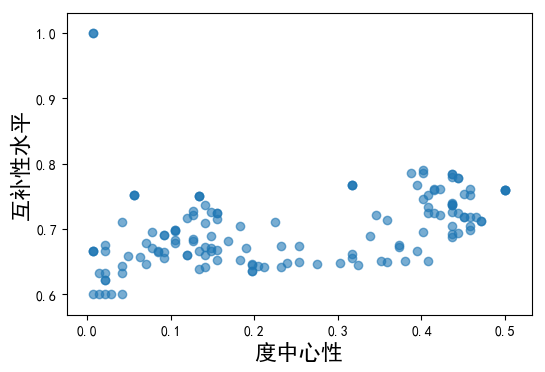

In [26]:
fig = plt.figure(dpi=100)
plt.scatter(theta2['度中心性'],theta2['media_theta'],alpha=0.6)
plt.xlabel('度中心性', fontsize = 16)
plt.ylabel('互补性水平', fontsize = 16)

In [27]:
betweenness_2=betweenness_1.sort_values(ascending = False)[:10]
betweenness_2

142    0.086133
71     0.085080
66     0.065673
48     0.062623
86     0.060023
75     0.055048
16     0.054732
76     0.052866
18     0.048294
28     0.046571
dtype: float64

In [28]:
dc_2=dc_1.sort_values(ascending = False)[:10]

In [29]:
closeness_2=closeness_1.sort_values(ascending = False)

In [30]:
centre2=pd.DataFrame([dc_2,betweenness_2]).T
centre2

,0,1
0,0.500000,NaN
2,0.500000,NaN
16,NaN,0.054732
18,NaN,0.048294
28,NaN,0.046571
48,NaN,0.062623
55,0.500000,NaN
58,0.457746,NaN
62,0.457746,NaN
64,0.457746,NaN


In [31]:
theta3=centre2.merge(theta1,how='left',right_on='skill1',left_index=True)
degree_10=theta3[[0,'skill1','media_theta']].dropna()
betwee_10=theta3[[1,'skill1','media_theta']].dropna()
degree_10

,0,skill1,media_theta
0,0.500000,0,0.760279
2,0.500000,2,0.760279
50,0.500000,55,0.760279
52,0.457746,58,0.717748
56,0.457746,62,0.698169
58,0.457746,64,0.761358
105,0.500000,120,0.760279
112,0.471831,128,0.711599
117,0.464789,133,0.718370
128,0.471831,144,0.711599


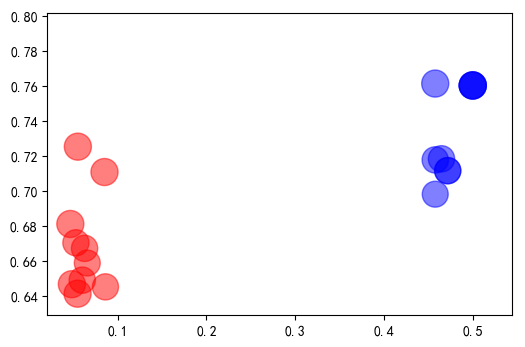

In [32]:
fig = plt.figure(dpi=100)
volume = 500 * degree_10['media_theta']
plt.scatter(degree_10[0],degree_10['media_theta'],c='b', s=volume,alpha=0.5)

volume1 = 500 * degree_10['media_theta']
plt.scatter(betwee_10[1],betwee_10['media_theta'],c='r', s=volume1,alpha=0.5)


# plt.xlabel('度中心性', fontsize = 20)
# plt.ylabel('互补性水平', fontsize = 20)

In [33]:
volume = 500 * degree_10['media_theta']
volume

0      380.139661
2      380.139661
50     380.139661
52     358.873826
56     349.084377
58     380.678899
105    380.139661
112    355.799300
117    359.185096
128    355.799300
Name: media_theta, dtype: float64

In [34]:
df_label= pd.read_excel(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17\认知技能标注.xlsx')

In [35]:
df_label.head()

,顺序,Element ID,label
0,0,1.A.1.a.1,0
1,1,1.A.1.a.2,0
2,2,1.A.1.a.3,0
3,3,1.A.1.a.4,0
4,4,1.A.1.b.1,0


In [36]:
theta3=theta2.merge(df_label,how='left',left_on='skill1',right_on='顺序')

In [41]:
df_all= pd.read_excel(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17\全行业技能互补性大于0.6 - 重复.xlsx')

In [42]:
all=df_all.groupby('skill1').mean()
all1=all.reset_index()
all1.head()

,skill1,skill2,all_theta
0,0,81.491803,0.705485
1,1,75.000000,0.720943
2,2,82.483333,0.712811
3,3,76.396552,0.732058
4,4,76.900000,0.703221


In [43]:
all2=all1.merge(df_label,how='left',left_on='skill1',right_on='顺序')
all2.head()

,skill1,skill2,all_theta,顺序,Element ID,label
0,0,81.491803,0.705485,0,1.A.1.a.1,0
1,1,75.000000,0.720943,1,1.A.1.a.2,0
2,2,82.483333,0.712811,2,1.A.1.a.3,0
3,3,76.396552,0.732058,3,1.A.1.a.4,0
4,4,76.900000,0.703221,4,1.A.1.b.1,0


In [44]:
from scipy import stats
stats.ttest_ind(theta3['label'],all2['label'])

Ttest_indResult(statistic=0.03240180486757966, pvalue=0.9741734605704383)

In [45]:
len(theta3[theta3['label']==0])

92

In [53]:
len(theta3[theta3['label']==0])/len(theta3)

0.6433566433566433

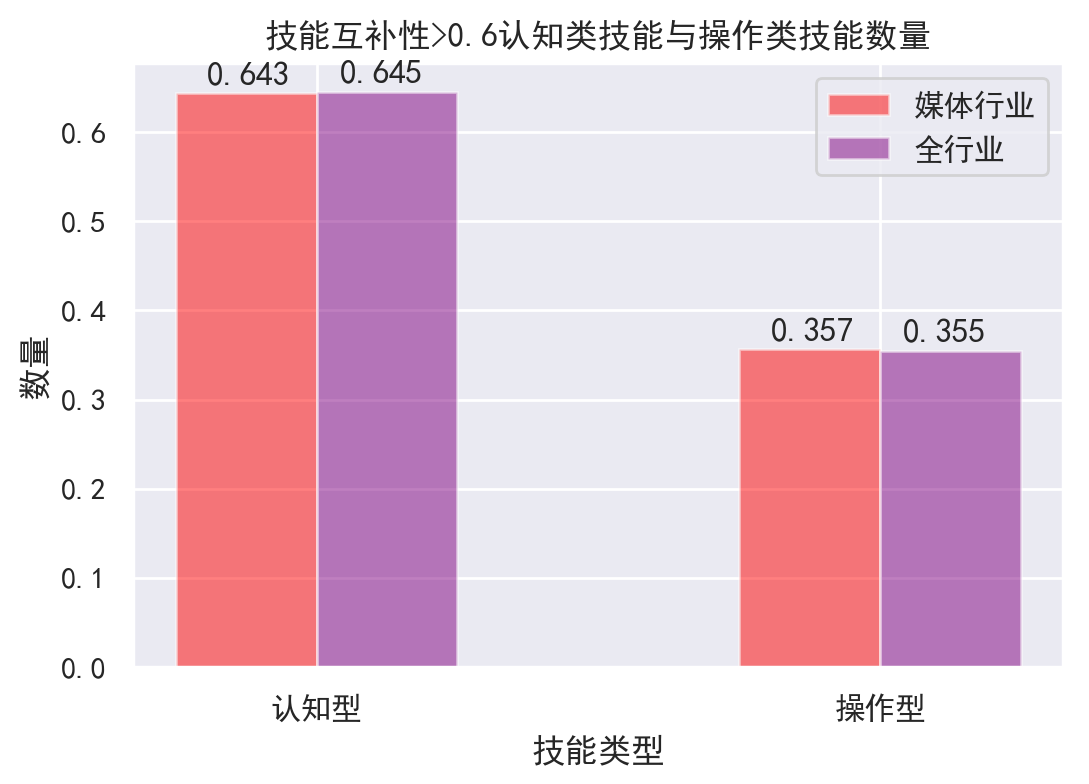

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False
fig, ax = plt.subplots(dpi=200)
#柱高信息
Y = [len(theta3[theta3['label']==0])/len(theta3),len(theta3[theta3['label']==1])/len(theta3)]#媒体行业
Y1 = [len(all2[all2['label']==0])/len(all2),len(all2[all2['label']==1])/len(all2)]
X = np.arange(len(Y))

bar_width = 0.25
tick_label = ['认知型','操作型']

#显示每个柱的具体高度
for x,y in zip(X,Y):
    plt.text(x+0.005,y+0.005,'%.3f' %y, ha='center',va='bottom')

for x,y1 in zip(X,Y1):
    plt.text(x+0.24,y1+0.005,'%.3f' %y1, ha='center',va='bottom')
 
#绘制柱状图    
plt.bar(X, Y, bar_width, align="center", color="red", label="媒体行业", alpha=0.5)
plt.bar(X+bar_width, Y1, bar_width, color="purple", align="center", \
        label="全行业", alpha=0.5)

plt.xlabel("技能类型")
plt.ylabel("数量")
plt.title('技能互补性>0.6认知类技能与操作类技能数量')

plt.xticks(X+bar_width/2, tick_label)
#显示图例
plt.legend()
# #plt.show()
# plt.savefig('result.png',dpi = 400)

## pagerank算法

In [57]:
df_t.head()

,skill1,skill2,media_theta
0,0,6,0.615385
1,0,7,0.615385
2,0,60,0.615385
3,0,61,0.615385
4,0,69,0.615385


In [62]:
df_t1=df_t.drop(columns='media_theta')

In [66]:
df_t1.to_csv(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17/input_3.txt',index=False)

In [67]:
# 输入为一个*.txt文件，例如
# A B
# B C
# B A
# ...表示前者指向后者
 
import numpy as np
 
if __name__ == '__main__':
 
    # 读入有向图，存储边
    f = open('input_3.txt', 'r')
    edges = [line.strip('\n').split(' ') for line in f]
    print(edges)
 
    # 根据边获取节点的集合
    nodes = []
    for edge in edges:
        if edge[0] not in nodes:
            nodes.append(edge[0])
        if edge[1] not in nodes:
            nodes.append(edge[1])
    print(nodes)
 
    N = len(nodes)
 
    # 将节点符号（字母），映射成阿拉伯数字，便于后面生成A矩阵/S矩阵
    i = 0
    node_to_num = {}
    for node in nodes:
        node_to_num[node] = i
        i += 1
    for edge in edges:
        edge[0] = node_to_num[edge[0]]
        edge[1] = node_to_num[edge[1]]
    print(edges)
 
    # 生成初步的S矩阵
    S = np.zeros([N, N])
    for edge in edges:
        S[edge[1], edge[0]] = 1
    print(S)
 
    # 计算比例：即一个网页对其他网页的PageRank值的贡献，即进行列的归一化处理
    for j in range(N):
        sum_of_col = sum(S[:,j])
        for i in range(N):
            S[i, j] /= sum_of_col
    print(S)
 
    # 计算矩阵A
    alpha = 0.85
    A = alpha*S + (1-alpha) / N * np.ones([N, N])
    print(A)
 
    # 生成初始的PageRank值，记录在P_n中，P_n和P_n1均用于迭代
    P_n = np.ones(N) / N
    P_n1 = np.zeros(N)
 
    e = 100000  # 误差初始化
    k = 0   # 记录迭代次数
    print('loop...')
 
    while e > 0.00000001:   # 开始迭代
        P_n1 = np.dot(A, P_n)   # 迭代公式
        e = P_n1-P_n
        e = max(map(abs, e))    # 计算误差
        P_n = P_n1
        k += 1
        print('iteration %s:'%str(k), P_n1)
 
    print('final result:', P_n)

[['0', '6'], ['0', '7'], ['0', '60'], ['0', '61'], ['0', '69'], ['0', '80'], ['0', '86'], ['0', '87'], ['0', '105'], ['0', '107'], ['0', '129'], ['0', '132'], ['0', '143'], ['0', '149'], ['0', '150'], ['0', '152'], ['0', '10'], ['0', '13'], ['0', '14'], ['0', '15'], ['0', '65'], ['0', '67'], ['0', '88'], ['0', '91'], ['0', '112'], ['0', '114'], ['0', '117'], ['0', '151'], ['0', '40'], ['0', '113'], ['0', '118'], ['0', '96'], ['0', '119'], ['0', '131'], ['0', '8'], ['0', '9'], ['0', '19'], ['0', '20'], ['0', '58'], ['0', '62'], ['0', '115'], ['0', '126'], ['0', '128'], ['0', '144'], ['0', '145'], ['0', '4'], ['0', '5'], ['0', '130'], ['0', '139'], ['0', '3'], ['0', '54'], ['0', '59'], ['0', '63'], ['0', '90'], ['0', '106'], ['0', '122'], ['0', '133'], ['0', '50'], ['0', '111'], ['0', '134'], ['0', '147'], ['0', '1'], ['0', '51'], ['0', '52'], ['0', '64'], ['0', '83'], ['0', '53'], ['0', '146'], ['0', '2'], ['0', '55'], ['0', '120'], ['1', '6'], ['1', '7'], ['1', '10'], ['1', '15'], ['1'

In [93]:
w=pd.DataFrame(nodes,P_n)
w=w.reset_index()
w=w.rename(columns={0:'编号'})
w['编号'] =w['编号'].map(int)
theta_w=w.merge(theta1,how='left',left_on='编号',right_on='skill1')
theta_w

,index,编号,skill1,skill2,media_theta
0,0.010185,0,0,81.802817,0.760279
1,0.004830,6,6,67.566667,0.641282
2,0.006077,7,7,76.527778,0.673515
3,0.004316,60,60,80.250000,0.641763
4,0.006524,61,61,70.410256,0.646434
5,0.005801,69,69,77.617647,0.647780
6,0.005533,80,80,76.393939,0.673992
7,0.008544,86,86,81.686275,0.649070
8,0.005201,87,87,72.250000,0.635107
9,0.003443,105,105,73.947368,0.639239


Text(0,0.5,'互补性水平')

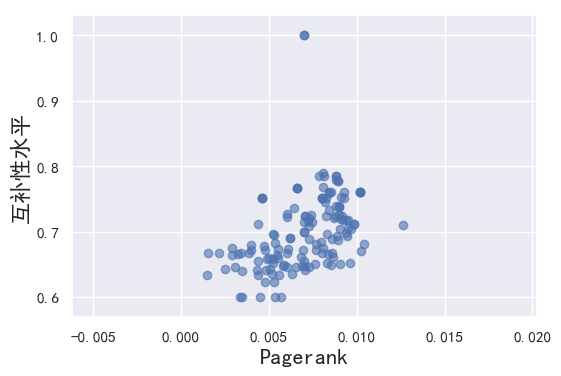

In [95]:
fig = plt.figure(dpi=100)
plt.scatter(theta_w['index'],theta_w['media_theta'],alpha=0.6)
plt.xlabel('Pagerank', fontsize = 16)
plt.ylabel('互补性水平', fontsize = 16)

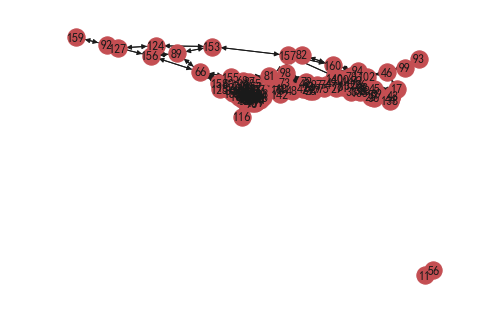

In [69]:
import networkx as nx
import matplotlib.pyplot as plt
 
if __name__ == '__main__':
 
    # 读入有向图，存储边
    f = open('input_3.txt', 'r')
    edges = [line.strip('\n').split(' ') for line in f]
 
    G = nx.DiGraph()
    for edge in edges:
        G.add_edge(edge[0], edge[1])
    nx.draw(G, with_labels=True)
    plt.show()

# 技能-全行业职业嵌入

In [2]:
emb_all=pd.read_excel(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17\媒体行业技能互补性 - 重复.xlsx')

In [6]:
emb_all_theta=emb_all.groupby('skill1').mean()
emb_all_theta=emb_all_theta.reset_index()
emb_all_theta=emb_all_theta.drop(columns='skill2')

In [7]:
emb_all_theta.head()

,skill1,all_theta,media_theta
0,0,0.482808,0.456124
1,1,0.486214,0.443660
2,2,0.478270,0.456124
3,3,0.483572,0.455746
4,4,0.480606,0.461127


In [10]:
def theta_cate (x):
    if x<=0.3:
        return 1
    if x<0.7:
        return 2
    if x<=1:
        return 3

In [11]:
emb_all_theta['theta_category']=emb_all_theta['all_theta'].apply(lambda x: theta_cate(x))

In [17]:
min_media=min(emb_all_theta['media_theta'])

In [18]:
max_media=max(emb_all_theta['media_theta'])

In [21]:
def norm(x):
    b=(x-min_media)/(max_media-min_media)
    return b

In [23]:
emb_all_theta['media_theta1']=emb_all_theta['media_theta'].apply(lambda x: norm(x))

In [29]:
# emb_all_theta['media_label']=emb_all_theta['media_theta1'].apply(lambda x: theta_cate(x))


In [26]:
emb_media_theta=emb_all_theta[['skill1','all_theta','media_theta','media_theta1','media_label']]

In [28]:
emb_media_theta.head()

,skill1,all_theta,media_theta,media_theta1,media_label
0,0,0.482808,0.456124,0.985431,3
1,1,0.486214,0.443660,0.958503,3
2,2,0.478270,0.456124,0.985431,3
3,3,0.483572,0.455746,0.984615,3
4,4,0.480606,0.461127,0.996240,3


In [ ]:
媒体行业17种全数据

In [30]:
job_media=pd.read_excel(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17\媒体行业17种全数据.xlsx')

In [31]:
job_media.head()

,O*NET-SOC Code,Element ID,Element Name,技能名称,Data Value,category,onet,Title,职业名称,rca,Description,职业描述,pro,label,category2
61180,27-3022.00,1.A.1.a.1,Oral Comprehension,口语理解,4.25,27,0.8125,Reporters and Correspondents,记者、通讯员,1.377221,Collect and analyze facts about newsworthy eve...,通过采访、调查或观察收集和分析有新闻价值的事件，为报纸、新闻杂志、广播或电视提供报道。,0.342321,0,27-30
60858,27-3012.00,1.A.1.a.1,Oral Comprehension,口语理解,4.00,27,0.7500,Public Address System and Other Announcers,公共广播系统和其他播音员,1.354202,Make announcements over public address system ...,在体育或其他公共活动中通过公共广播系统发声，包括婚礼、派对、俱乐部或其他聚会场所的司仪或音乐...,0.596611,0,27-30
61985,27-3043.05,1.A.1.a.1,Oral Comprehension,口语理解,3.75,27,0.6875,"Poets, Lyricists and Creative Writers",诗人、作词者、作家,1.322464,"Create original written works, such as scripts...",原创剧本、散文、散文、诗歌或歌词，供发表或表演。,0.281567,0,27-30
61824,27-3043.04,1.A.1.a.1,Oral Comprehension,口语理解,4.12,27,0.7800,Copy Writers,文案、广告脚本撰写员,1.319192,Write advertising copy for use by publication ...,为产品撰写广告文案，用于媒体宣传，以促进商品和服务的销售。,0.485140,0,27-30
61341,27-3031.00,1.A.1.a.1,Oral Comprehension,口语理解,4.38,27,0.8450,Public Relations Specialists,公共关系专家,1.276850,Engage in promoting or creating an intended pu...,撰写宣传资料，掌握媒体资源，为个人、团体或组织宣传或树立良好公众形象。,0.289123,0,27-30


In [32]:
job_media['job_category']=job_media['pro'].apply(lambda x: theta_cate(x))

In [33]:
job_category=job_media.drop_duplicates(subset ='Element ID', keep = 'first')

In [36]:
job_category=job_category.reset_index(drop = True)
skill2job=job_category.merge(emb_media_theta,how='left',left_index=True,right_on='skill1')

In [37]:
skill2job

,O*NET-SOC Code,Element ID,Element Name,技能名称,Data Value,category,onet,Title,职业名称,rca,...,职业描述,pro,label,category2,job_category,skill1,all_theta,media_theta,media_theta1,media_label
0,27-3022.00,1.A.1.a.1,Oral Comprehension,口语理解,4.25,27,0.8125,Reporters and Correspondents,记者、通讯员,1.377221,...,通过采访、调查或观察收集和分析有新闻价值的事件，为报纸、新闻杂志、广播或电视提供报道。,0.342321,0,27-30,2,0,0.482808,0.456124,0.985431,3
1,27-3041.00,1.A.1.a.2,Written Comprehension,写作理解,4.88,27,0.9700,Editors,主编,1.671041,...,计划、协调、编辑出版内容，包括技术编辑。,0.348379,0,27-30,2,1,0.486214,0.443660,0.958503,3
2,27-3012.00,1.A.1.a.3,Oral Expression,口语表达,4.25,27,0.8125,Public Address System and Other Announcers,公共广播系统和其他播音员,1.486443,...,在体育或其他公共活动中通过公共广播系统发声，包括婚礼、派对、俱乐部或其他聚会场所的司仪或音乐...,0.596611,0,27-30,2,2,0.478270,0.456124,0.985431,3
3,27-3043.05,1.A.1.a.4,Written Expression,写作理解,4.62,27,0.9050,"Poets, Lyricists and Creative Writers",诗人、作词者、作家,2.072999,...,原创剧本、散文、散文、诗歌或歌词，供发表或表演。,0.281567,0,27-30,1,3,0.483572,0.455746,0.984615,3
4,27-3043.05,1.A.1.b.1,Fluency of Ideas,思维流畅性,4.25,27,0.8125,"Poets, Lyricists and Creative Writers",诗人、作词者、作家,2.282769,...,原创剧本、散文、散文、诗歌或歌词，供发表或表演。,0.281567,0,27-30,1,4,0.480606,0.461127,0.996240,3
5,27-3043.05,1.A.1.b.2,Originality,原创性,4.25,27,0.8125,"Poets, Lyricists and Creative Writers",诗人、作词者、作家,2.372412,...,原创剧本、散文、散文、诗歌或歌词，供发表或表演。,0.281567,0,27-30,1,5,0.479338,0.461127,0.996240,3
6,27-3022.00,1.A.1.b.3,Problem Sensitivity,问题敏感性,3.75,27,0.6875,Reporters and Correspondents,记者、通讯员,1.219250,...,通过采访、调查或观察收集和分析有新闻价值的事件，为报纸、新闻杂志、广播或电视提供报道。,0.342321,0,27-30,2,6,0.476408,0.384863,0.831474,3
7,27-3042.00,1.A.1.b.4,Deductive Reasoning,演绎推理,3.75,27,0.6875,Technical Writers,技术文档撰写员,1.308394,...,编写技术资料，如设备手册、附件或操作维护说明，协助布局工作。,0.705693,0,27-30,3,7,0.484555,0.350780,0.757842,3
8,27-3022.00,1.A.1.b.5,Inductive Reasoning,归纳推理,3.88,27,0.7200,Reporters and Correspondents,记者、通讯员,1.376064,...,通过采访、调查或观察收集和分析有新闻价值的事件，为报纸、新闻杂志、广播或电视提供报道。,0.342321,0,27-30,2,8,0.477689,0.407681,0.880773,3
9,27-3042.00,1.A.1.b.6,Information Ordering,信息有序化,3.62,27,0.6550,Technical Writers,技术文档撰写员,1.320494,...,编写技术资料，如设备手册、附件或操作维护说明，协助布局工作。,0.705693,0,27-30,3,9,0.460954,0.448775,0.969554,3


### 模型

In [39]:
import numpy as np
from collections import Counter
import pandas as pd
import re
import datetime
import sys
from glob import glob
import seaborn as sns
import gensim
from scipy import spatial
import multiprocessing
from gensim.models.doc2vec import Doc2Vec, LabeledSentence
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
# from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
pd.set_option('display.max_columns',None)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth',10000)

In [64]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def projection(one, two):
    # cosine similarity
    return (1 - spatial.distance.cosine(one, two))

def cosine2angle(i):
    return np.arccos(i) / np.pi * 180

In [40]:
TaggededDocument = gensim.models.doc2vec.TaggedDocument

In [46]:
diction=dict(skill2job[['Element Name','media_label']].values)

In [48]:
x_train=[]
for i,e in enumerate(list(set(skill2job['job_category'].values))):
    
    data=skill2job[skill2job['job_category']==e]
    doc=list(data['Element Name'].values)
    word_list=[]
    for j in range(len(doc)-1):
        try:
            if doc[j]!=doc[j+1]:
                word_list.extend([str(diction[doc[j]]),doc[j]])
        except:
            pass
    document = TaggededDocument(word_list, tags=[e])
    x_train.append(document)

In [49]:
def train(x_train, size=50, epoch_num=1):
    model_dm = Doc2Vec(x_train, size = size, dbow_words=1, min_count=1)
    model_dm.train(x_train, total_examples=model_dm.corpus_count, epochs=70)
    model_dm.save('doc2vec1_random')
    return model_dm

In [58]:
model_dm=train(x_train)

C:\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:575: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [54]:
x_train[2]

TaggedDocument(words=['3', 'Deductive Reasoning', '3', 'Information Ordering', '3', 'Administration and Management', '3', 'Clerical', '3', 'Computers and Electronics', '1', 'Mathematics', '1', 'Chemistry', '2', 'Medicine and Dentistry', '2', 'Education and Training', '3', 'Identifying Objects, Actions, and Events', '3', 'Processing Information', '1', 'Evaluating Information to Determine Compliance with Standards', '3', 'Analyzing Data or Information', '3', 'Updating and Using Relevant Knowledge', '3', 'Interacting With Computers'], tags=[3])

In [66]:
radius=[]
for j in range(len(x_train)):
    try:
        c1=[]
        for i in range((len(x_train[j].words)+1)//2):
            c=(-projection(normalize(model_dm.docvecs[x_train[j].tags[0]]),normalize(model_dm[x_train[j].words[2*i+1]]))+1)/2
            c1.append(c)
        c2=np.sqrt(np.sum([i**2/len(c1) for i in c1]))#平方和/N开根号
        c3=max(c1)-min(c1)
        radius.append([c3,c2,x_train[j].tags[0]])
    except:
        radius.append([np.nan,x_train[j].tags[0]])
        pass
    
d=pd.DataFrame(radius)

In [76]:
d=d.rename(columns={0:'radius',1:'maxmin_p',2:'job_category'})

In [80]:
d


,radius,maxmin_p,job_category
0,0.001923,0.000612,1
1,0.004584,0.000999,2
2,0.000883,0.000498,3


In [77]:
reg=skill2job.merge(d,how='left',on='job_category')

In [78]:
reg.columns

Index(['O*NET-SOC Code', 'Element ID', 'Element Name', '技能名称', 'Data Value', 'category', 'onet', 'Title', '职业名称', 'rca', 'Description', '职业描述', 'pro', 'label', 'category2', 'job_category', 'skill1', 'all_theta', 'media_theta', 'media_theta1', 'media_label', 'radius', 'maxmin_p'], dtype='object')

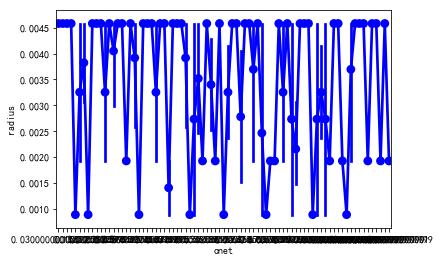

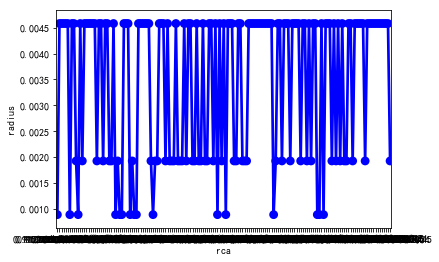

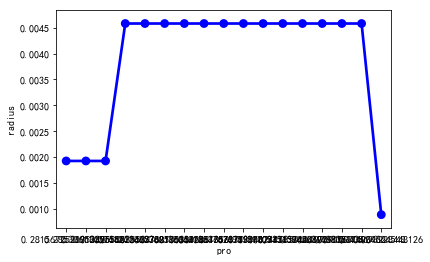

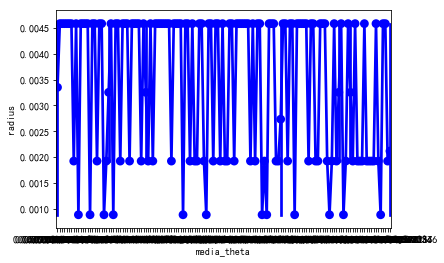

In [79]:
sns.pointplot(x="onet",y="radius",data=reg,color='blue')
plt.show()
sns.pointplot(x="rca",y="radius",data=reg,color='blue')
plt.show()
sns.pointplot(x="pro",y="radius",data=reg,color='blue')
plt.show()
sns.pointplot(x="media_theta",y="radius",data=reg,color='blue')
plt.show()


In [84]:
reg1 = smf.ols('maxmin_p ~ media_theta+onet+rca+pro',
               data = reg).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               maxmin_p   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     5.089
Date:                Sat, 23 May 2020   Prob (F-statistic):           0.000700
Time:                        21:51:41   Log-Likelihood:                 1148.6
No. Observations:                 161   AIC:                            -2287.
Df Residuals:                     156   BIC:                            -2272.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0007   7.76e-05      9.607      0.000       0.001       0.001
media_theta    -0.0001      0.000     -0.675      0.501      -0.000       0.000
onet           -0.0001      0.000     -1.242      0.216      -0.000    7.69e-05
rca          3.566e-05   1.84e-05      1.939      0.054   -6.68e-07     7.2e-05
pro             0.0003      0.000      3.093      0.002       0.000       0.001
==============================================================================
Omnibus:                       15.936   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.973
Skew:                          -0.754   Prob(JB):                     0.000206
Kurtosis:                       2.493   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# df_s['全行业相似性']=round(df_s['all_theta'],2)

In [3]:
df_s['媒体行业相似性']=round(df_s['media_theta'],2)

In [4]:
m=list(zip(df_s.skill1,df_s.skill2,df_s.媒体行业相似性))
# m

In [21]:
len(m)

12880

In [6]:
df_label= pd.read_excel(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17\161种技能的标签.xlsx')

In [7]:
clubs = [i for i in G.nodes()]
clubs
colors = []
for j in clubs:
    if df_label['label'][j] ==0:
        colors.append('r')
    else:
        colors.append('b')
 

NameError: name 'G' is not defined

In [8]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)
G = nx.Graph()
G.add_weighted_edges_from(m)
nodes=G.nodes()
degrees = G.degree()
n_size = np.asarray([degrees[n] for n in nodes])

# nx.draw(G,nodelist=nodes,node_size=n_size,with_labels =False,node_color=n_size, cmap= 'rainbow',width=df_media.可能性/10,alpha=0.8)
nx.draw(G,node_size=n_size,with_labels =False, node_color=colors,width=df_s['media_theta']/7,alpha=0.3)
# nx.draw(G,node_size=G.degree(),with_labels = False, node_color=colors,width=df_s['media_theta']/7,alpha=0.5)
# nx.draw_networkx_edges(G,pos,width=[float(d['weight']*10) for (u,v,d) in m])
# plt.title("媒体相关职业技能互补性", fontsize = 20)

plt.show()  


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


NameError: name 'colors' is not defined

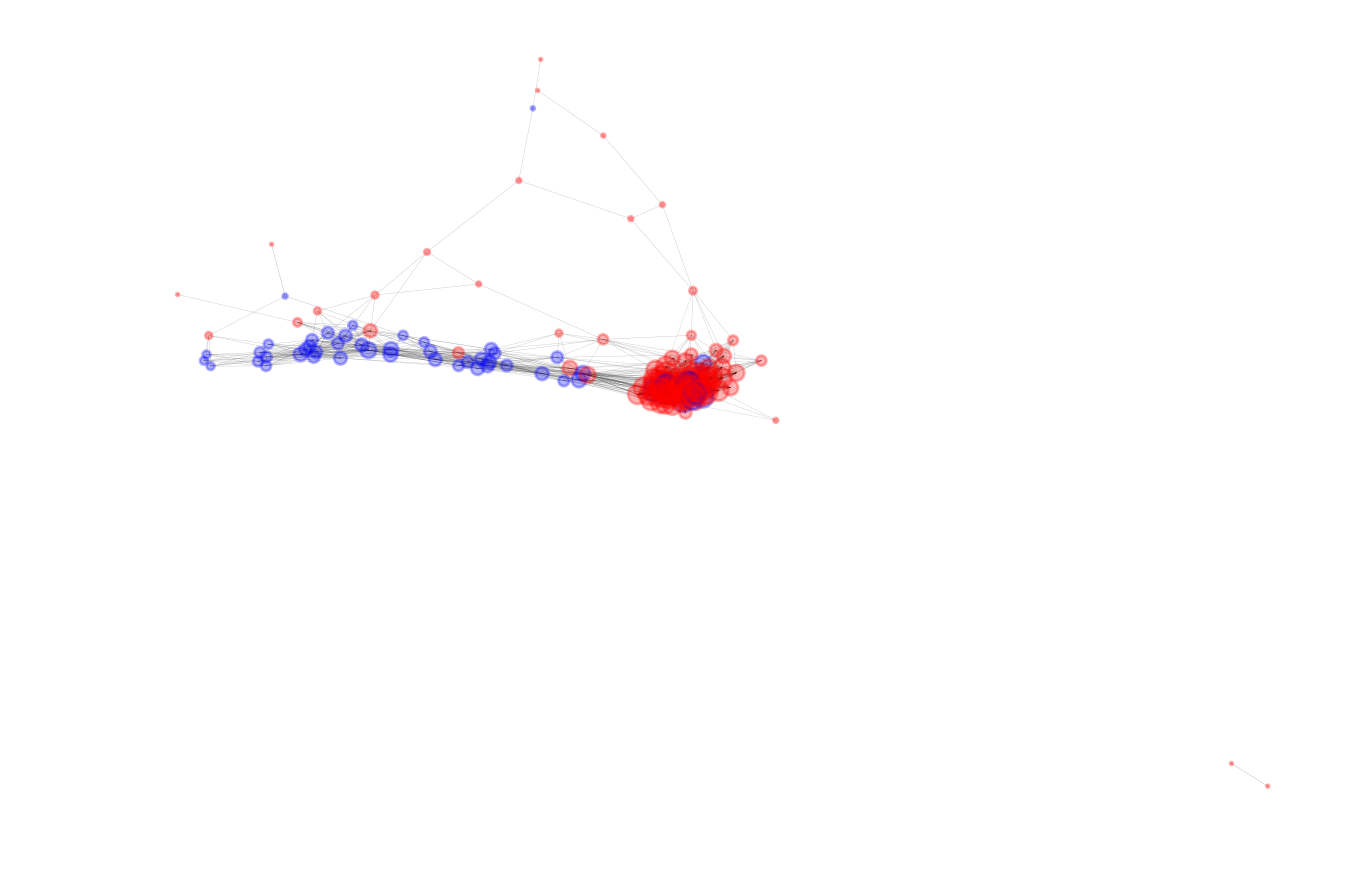

In [79]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)
G = nx.Graph()
G.add_weighted_edges_from(m)
nodes=G.nodes()
degrees = G.degree()
n_size = np.asarray([degrees[n] for n in nodes])

# nx.draw(G,nodelist=nodes,node_size=n_size,with_labels =False,node_color=n_size, cmap= 'rainbow',width=df_media.可能性/10,alpha=0.8)
nx.draw(G,node_size=n_size,with_labels =False, node_color=colors,width=df_s['media_theta']/7,alpha=0.3)
# nx.draw(G,node_size=G.degree(),with_labels = False, node_color=colors,width=df_s['media_theta']/7,alpha=0.5)
# nx.draw_networkx_edges(G,pos,width=[float(d['weight']*10) for (u,v,d) in m])
# plt.title("媒体相关职业技能互补性", fontsize = 20)

plt.show()

In [16]:
G.degree(140)

11

In [112]:
 G.nodes()

NodeView((4, 8, 18, 62, 69, 70, 86, 88, 91, 107, 126, 142, 143, 149, 150, 5, 6, 40, 67, 118, 128, 144, 7, 10, 117, 60, 125, 130, 152, 16, 41, 61, 73, 87, 105, 113, 132, 139, 158, 13, 21, 23, 42, 47, 77, 79, 17, 28, 48, 97, 98, 22, 24, 25, 33, 35, 71, 26, 76, 94, 100, 137, 141, 31, 36, 39, 43, 44, 45, 72, 123, 138, 29, 38, 65, 151, 68, 80, 81, 155, 66, 78, 102, 160, 135, 136, 82, 157, 129, 89, 153, 156, 92, 159, 112, 145, 114, 115, 116, 124, 0, 2, 3, 15, 9, 19, 51, 54, 55, 83, 120, 64, 133, 20, 14, 27, 49, 74, 75, 140, 58, 134, 147, 50, 53, 111, 146, 96, 119, 131, 1, 122, 52, 59, 63, 90, 106, 46, 93, 99, 127, 11, 56))

In [42]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize = (24, 16))
# ax = fig.add_subplot(111, projection='3d') #ax = Axes3D(fig)
# ax.scatter(df_s['skill1'],df_s['skill2'],df_s['相似性'], c='b', marker='o')
# # ax.scatter(X['TV'], X['radio'], y_pred, c='r', marker='+')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.show()

In [29]:
df_s_all= pd.read_excel(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17\全行业技能互补性.xlsx')
df_s_all.head()

,skill1,skill2,all_theta
9311,76,78,0.949239
6098,44,49,0.943590
5977,43,44,0.940722
5007,35,38,0.935606
527,3,54,0.930041


In [30]:
df_s_all['all_theta']=round(df_s_all['all_theta'],2)

In [31]:
n=list(zip(df_s_all.skill1,df_s_all.skill2,df_s_all.all_theta))

In [32]:
len(n)

2582

In [33]:
clubs = [i for i in G.nodes()]
clubs
colors = []
for j in clubs:
    if df_label['label'][j] ==0:
        colors.append('r')
    else:
        colors.append('b')

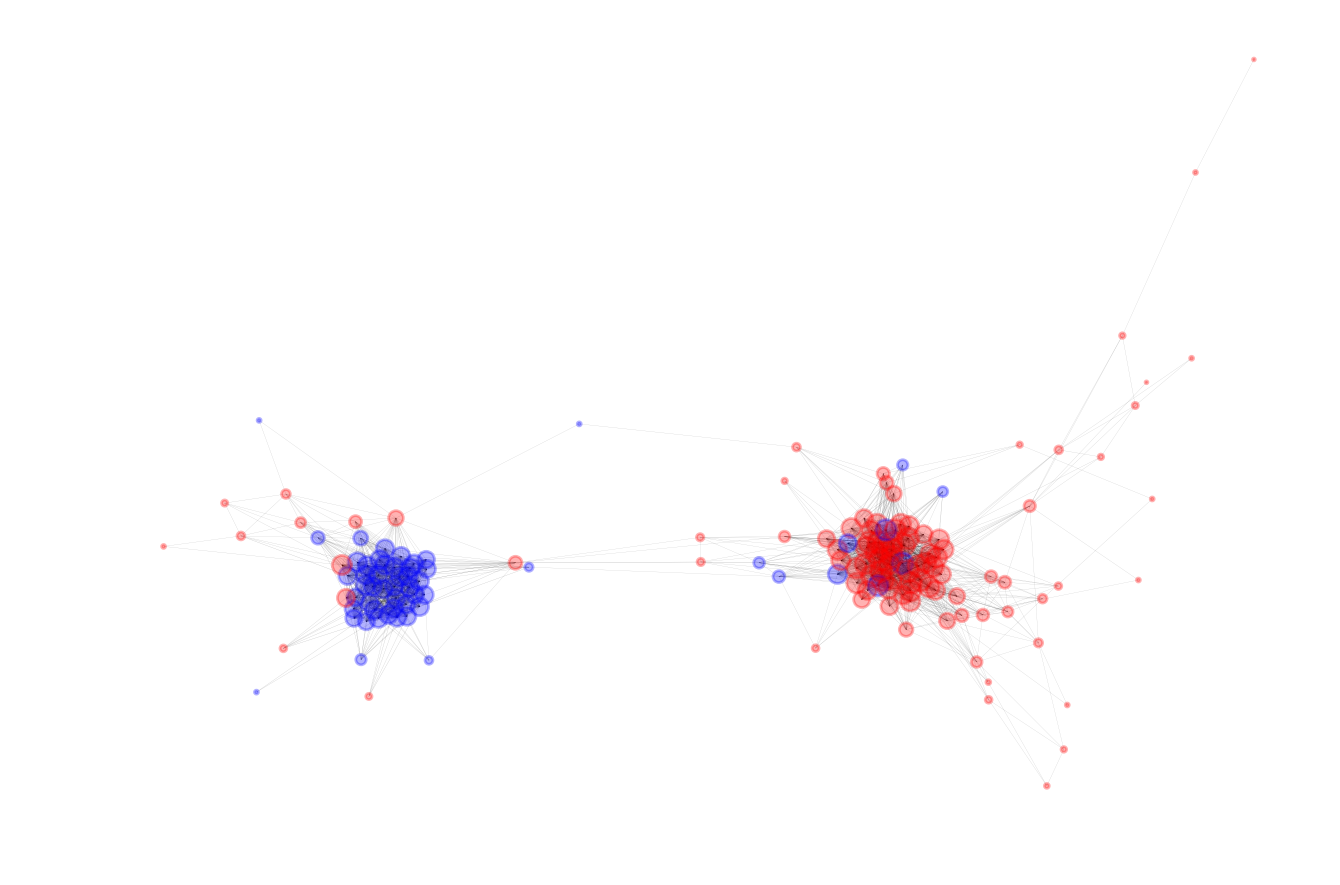

In [62]:
plt.figure(dpi=200)
G = nx.Graph()
G.add_weighted_edges_from(n)
nodes=G.nodes()
degrees = G.degree()
n_size = np.asarray([degrees[n] for n in nodes])
nx.draw(G,node_size=n_size, with_labels = False, width=df_s_all['all_theta']/10,node_color=colors,alpha=0.3)
# nx.draw(G,node_size=,with_labels = False, node_color=colors,alpha=0.5)
# plt.title("全行业技能互补性", fontsize = 50)

# plt.legend(["社会认知类技能","感官操作类技能"])
plt.show()  

In [52]:
G.degree(104)

1

In [39]:
df_s_1= pd.read_excel(r'C:\Users\Asus\Desktop\文件夹\项目\人工智能时代媒体就业\17\全行业技能互补性 - 未筛选.xlsx')
# df_s_a.head()

In [177]:
df_s_1['all_theta']=round(df_s_1['all_theta'],2)

In [178]:
r=list(zip(df_s_1.skill1,df_s_1.skill2,df_s_1.all_theta))

In [181]:
clubs = [i for i in G.nodes()]
clubs
colors = []
for j in clubs:
    if df_label['label'][j] ==0:
        colors.append('r')
    else:
        colors.append('b')

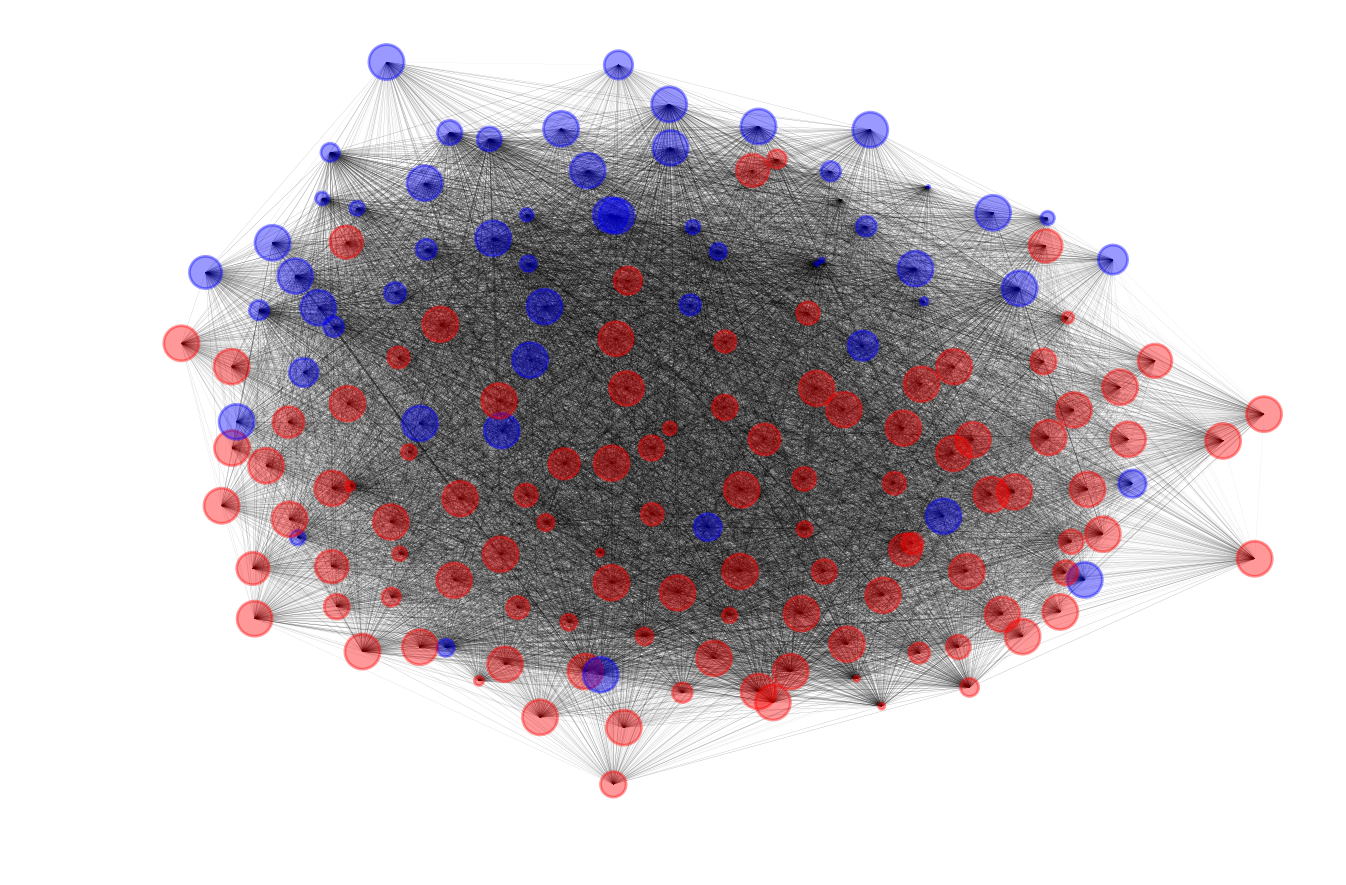

In [182]:
plt.figure(dpi=200)
G = nx.Graph()
G.add_weighted_edges_from(r)
nx.draw(G,node_size=G.degree(), with_labels = False, width=df_s_1['all_theta']/7,node_color=colors,alpha=0.4)
# nx.draw(G,node_size=,with_labels = False, node_color=colors,alpha=0.5)
# plt.title("全行业技能互补性", fontsize = 50)

# plt.legend(["社会认知类技能","感官操作类技能"],["社会认知类技能","感官操作类技能"])
plt.show() 

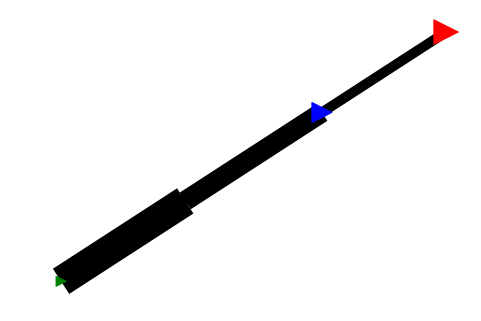

In [45]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
# position={1:(1,0),2:(2,0),3:(3,0),4:(4,0)}
ncolor=['r','b','k','g']
#nshape=['o','d','>','v']
nsize=[600,400,200,100]
NL=[10,20,30]
nx.draw(G,node_color=ncolor,node_shape='>',node_size=nsize,width=NL)


In [31]:
G